In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

Trx_Rank ===> El User dah ma3 el Merchant dah dee kant el transaction rakam kam benhom

Trx_Vlu ===> El conversion from points to actual money after the multiplication of Points with redemtion factor

Trx_Age ===> El Traansaction dee kan ba2alha kam youm ma ben el User dah wel merchant 3and el Trx_Rank rakm kaza

Customer_Age ===> El User dah a5er mara shoftoh kan men youm kza (El User Momken yeb2a a5er youm shofto feeh kan men 4 ayam we 3andoo 2 transactions_age taree5 awel wa7da kant fee nafs el youm w 2 wa7da kant online youm 8 )

In [2]:
df = pd.read_csv('Cleaned_Data_Merchant_Name.csv')
df

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


In [4]:
df[df['User_Id']==68]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
10511,1,5200,520.0,161,72,Grocery,68,Rajasthan Handicrafts
10512,2,1360,136.0,72,72,Grocery,68,Rajasthan Handicrafts


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Name             43672 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ MB


In [5]:
df.describe()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,User_Id
count,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000
mean,1.265227,3312.249748,331.224975,185.186664,144.027844,17173.411889
std,0.776549,5756.374137,575.637414,121.989540,114.764448,9665.399084
min,1.000000,20.000000,2.000000,1.000000,1.000000,0.000000
25%,1.000000,1220.000000,122.000000,62.000000,34.000000,8710.750000
50%,1.000000,1893.500000,189.350000,203.000000,115.000000,17561.000000
75%,1.000000,3100.000000,310.000000,271.000000,252.000000,25634.250000
max,17.000000,263800.000000,26380.000000,698.000000,682.000000,33518.000000


In [6]:
df[df['Points'] <= 20]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
11,1,20,2.0,39,1,F&B,13519,Radha Emporium
24,1,20,2.0,356,27,Other,24999,Ganpati Enterprises
2046,1,20,2.0,164,67,Grocery,9834,Saraswati Fabrics
2409,2,20,2.0,15,1,Grocery,11414,Saraswati Fabrics
3730,1,20,2.0,347,303,Grocery,17844,Saraswati Fabrics
...,...,...,...,...,...,...,...,...
43651,1,20,2.0,67,67,F&B,9834,Cuttack Curtain Corner
43656,2,20,2.0,56,1,F&B,13519,Cuttack Curtain Corner
43657,4,20,2.0,56,1,F&B,13519,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


In [7]:
df[df['Trx_Age'] == df['Customer_Age']]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders
5,1,16740,1674.0,34,34,F&B,1447,Radha Emporium
6,1,5820,582.0,33,33,F&B,2709,Radha Emporium
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


Checking if Rank is equal to 1 when the Transaction age is equal to Customer age as when the transactions happens at the same time of the last day customer 

In [8]:
df[df['Category In English'] == 'F&B']['Mer_Name'].value_counts()

Jai Hind General Stores         3387
Amritsar Auto Accessories       1302
Gurgaon Gift Gallery            1012
Mumbai Fashion Hub               907
Pune Perfumes Paradise           553
Varanasi Silk House              157
Jodhpur Jewelry Junction         104
Nashik Noodle Niche               88
Bhubaneswar Baker's Boutique      47
Cuttack Curtain Corner            41
Jamshedpur Jeans Junction         38
Punjabi Furniture Palace          35
Jaipur Pottery Emporium           19
Radha Emporium                    11
Goa Grocery Galaxy                 6
Udaipur Utensil Universe           4
Kollam Kitchenware Kingdom         4
Bangalore Book House               2
Raipur Rice Retail                 2
Chennai Gems and Jewels            1
Name: Mer_Name, dtype: int64

In [9]:
df[df['Trx_Age'] == df['Customer_Age']]['Trx_Rank'].value_counts()

1     29210
2      3449
3       745
4       267
5        89
6        40
7        22
8        11
9         7
12        4
10        3
11        2
13        1
Name: Trx_Rank, dtype: int64

In [10]:
df['Trx_Rank'] = df.apply(lambda r: 1 if (r['Trx_Rank'] > 1) and (r['Trx_Age'] == r['Customer_Age']) else r['Trx_Rank'], axis=1)

In [11]:
df[df['Trx_Age'] == df['Customer_Age']]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders
2,1,8500,850.0,368,368,Fashion,26472,Shankar Traders
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders
5,1,16740,1674.0,34,34,F&B,1447,Radha Emporium
6,1,5820,582.0,33,33,F&B,2709,Radha Emporium
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


In [12]:
df[df['Trx_Age'] == df['Customer_Age']]['Trx_Rank'].value_counts()

1    33850
Name: Trx_Rank, dtype: int64

In [13]:
df['Category In English'].value_counts()

Grocery            30694
F&B                 7720
Fashion             3333
Health & Beauty     1504
Electronics          228
Transportaion        146
Other                 47
Name: Category In English, dtype: int64

# Feature Engineering

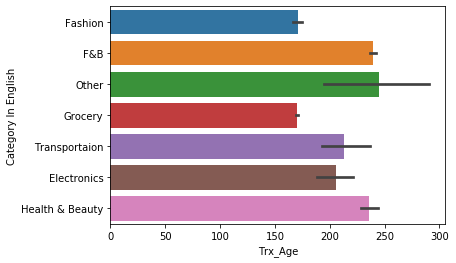

In [69]:
sns.barplot(x = df['Trx_Age'], y=df['Category In English'])

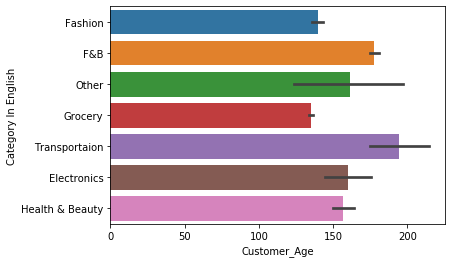

In [70]:
sns.barplot(x = df['Customer_Age'], y=df['Category In English'])

# Recency, Frequency, MonetaryValue (RFM)

In [14]:
# Assuming 'Trx_Age' is the number of days
reference_date = pd.to_datetime('2022-01-01')  # Choose a suitable reference date

# Convert 'Trx_Age' to datetime format by adding it to the reference date
df['Trx_Age'] = reference_date + pd.to_timedelta(df['Trx_Age'], unit='D')

In [15]:
import datetime as dt
snapshot_date = max(df.Trx_Age) + dt.timedelta(days=1)

In [16]:
# RFM table
# Aggregate data by each customer
rfm = df.groupby('User_Id').agg({'Trx_Age': lambda x: (snapshot_date - x.max()).days, 'Trx_Rank': lambda x: len(x), 'Trx_Vlu': lambda x: x.sum()}).reset_index()
rfm['Trx_Age'] = rfm['Trx_Age'].astype(int)

# Rename columns
rfm.rename(columns={'Trx_Age': 'Recency', 
                         'Trx_Rank': 'Frequency', 
                         'Trx_Vlu': 'MonetaryValue'}, inplace=True)

C:\Users\Seif\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
C:\Users\Seif\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
C:\Users\Seif\anaconda3\lib\site-packages\ipyke

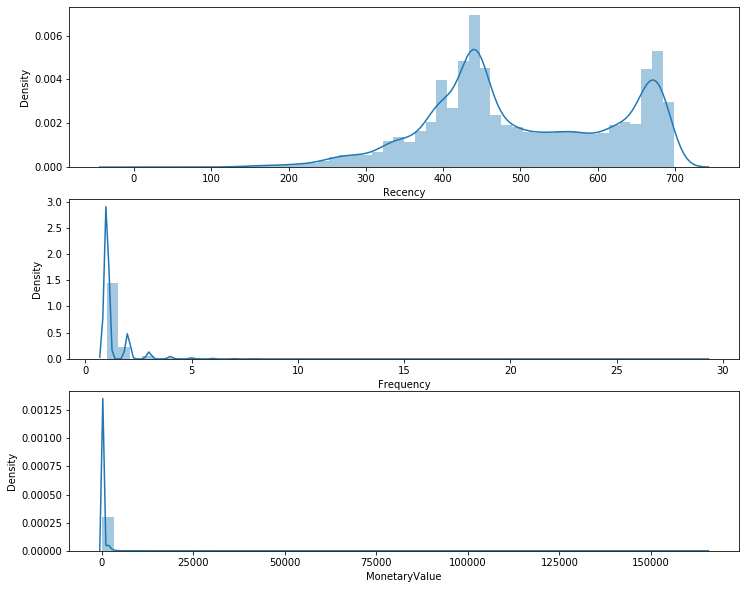

In [18]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])

# Show the plot
plt.show()

In [17]:
# Set the Numbers
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(rfm['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(rfm['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(rfm['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
33452,306.059802,0.179544,8.406118
33453,321.981083,0.000000,3.634241
33454,314.027705,0.000000,5.091643
33455,472.708543,0.000000,5.943922
33456,183.734936,0.179544,8.281635


In [18]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2))

[-0. -0.  0.]
[1. 1. 1.]


In [19]:
from sklearn.preprocessing import normalize
data_scaled = normalize(customers_fix)
data_scaled = pd.DataFrame(data_scaled, columns=customers_fix.columns)
data_scaled

,Recency,Frequency,MonetaryValue
0,0.999672,0.000000,0.025618
1,0.999906,0.000000,0.013700
2,0.999791,0.000000,0.020450
3,0.999798,0.000000,0.020085
4,0.999812,0.000000,0.019387
...,...,...,...
33452,0.999623,0.000586,0.027455
33453,0.999936,0.000000,0.011286
33454,0.999869,0.000000,0.016212
33455,0.999921,0.000000,0.012573


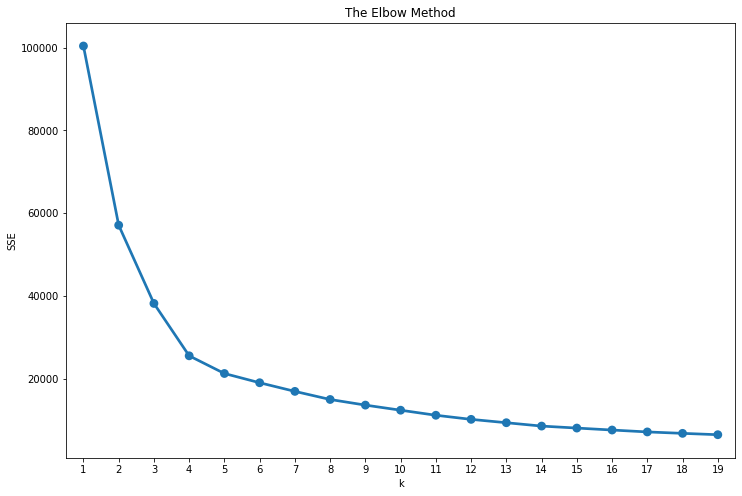

In [20]:
plt.figure(figsize=(12,8))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 20)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    
    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / customers_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [103]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.517431427663327
2 : 1.1252730966535456
3 : 0.8100418615567169
4 : 0.7017433883039199
5 : 0.6489406700154231
6 : 0.6016504588530409
7 : 0.5629382676557038
8 : 0.5379156800982009
9 : 0.5082464815091505
10 : 0.46817105073128
11 : 0.4616813772450259
12 : 0.44426969185508675
13 : 0.4292596742983511
14 : 0.4139027637467678
15 : 0.40042629809157293
16 : 0.3929301181069057
17 : 0.3802471532439485
18 : 0.3668998253339932
19 : 0.3620700331239057


In [21]:
from sklearn.preprocessing import normalize
data_scaled = normalize(customers_fix)
data_scaled = pd.DataFrame(data_scaled, columns=customers_fix.columns)
data_scaled

,Recency,Frequency,MonetaryValue
0,0.999672,0.000000,0.025618
1,0.999906,0.000000,0.013700
2,0.999791,0.000000,0.020450
3,0.999798,0.000000,0.020085
4,0.999812,0.000000,0.019387
...,...,...,...
33452,0.999623,0.000586,0.027455
33453,0.999936,0.000000,0.011286
33454,0.999869,0.000000,0.016212
33455,0.999921,0.000000,0.012573


In [22]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(33457,)

In [23]:
# The lowest SSE value
print(f"Inertia = {kmeans.inertia_}")

# Final locations of the centroid
print(f"Cluster centers are: {kmeans.cluster_centers_}")

# The number of iterations required to converge
print(f"The number of iterations until convergence is {kmeans.n_iter_} iterations")

Inertia = 6421.591220347176
Cluster centers are: [[ 0.73998932  2.0440514   0.06170286]
 [-0.38442588 -0.48674791 -0.34715167]
 [ 1.25195511 -0.48674791 -0.80299401]
 [ 1.07043641 -0.48674791  2.42538854]
 [-1.87917295  2.05922473  0.18847313]
 [-1.13682417  2.06793529  2.74293781]
 [ 1.1734138  -0.48674791  0.64130112]
 [-0.86985354 -0.48674791  2.73308923]
 [-1.86343133 -0.48674791 -0.61392695]
 [ 0.44228636 -0.48674791 -0.33953213]
 [-1.24669331  2.08997944  9.97133463]
 [-0.66104402  2.04645331 -0.21927802]
 [-0.47597586 -0.48674791 -0.92436339]
 [-0.68015772  2.05448386  0.85356057]
 [-0.96782992  2.05896211  4.47853808]
 [-0.97310648 -0.48674791 -0.46404579]
 [ 1.31121085 -0.48674791 -0.19116505]
 [ 0.64620631  2.05294533  2.29134937]
 [-0.3991967  -0.48674791  0.48527566]]
The number of iterations until convergence is 30 iterations


In [170]:
456130.4633861282/6421.591220347177

71.03075355230537

In [152]:
rfm.shape

(33457, 4)

In [24]:
rfm["Cluster"] = model.labels_
rfm.head()

,User_Id,Recency,Frequency,MonetaryValue,Cluster
0,0,418,1,442.7,2
1,1,665,1,249.0,0
2,2,463,1,300.0,2
3,3,379,1,162.0,2
4,4,292,1,70.0,2


In [25]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue       
           mean      mean          mean  count
Cluster                                       
0         633.7       1.0         287.2  12203
1         408.8       2.4         401.5   5153
2         431.2       1.0         201.0  13888
3         426.3       2.3        2756.3   2213

In [26]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

rfm["Cluster"] = model.labels_
rfm.head()
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue       
           mean      mean          mean  count
Cluster                                       
0         633.7       1.0         287.2  12203
1         408.8       2.4         401.5   5153
2         431.2       1.0         201.0  13888
3         426.3       2.3        2756.3   2213

In [27]:
rfm

,User_Id,Recency,Frequency,MonetaryValue,Cluster
0,0,418,1,442.7,2
1,1,665,1,249.0,0
2,2,463,1,300.0,2
3,3,379,1,162.0,2
4,4,292,1,70.0,2
...,...,...,...,...,...
33452,33514,431,3,594.0,1
33453,33515,455,1,48.0,2
33454,33516,443,1,132.0,2
33455,33517,686,1,210.0,0


In [28]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = rfm.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.683050,-0.486748,0.427948,0,2
1,1.345509,-0.486748,-0.142321,1,0
2,-0.308526,-0.486748,0.030502,2,2
3,-1.009835,-0.486748,-0.502355,3,2
4,-1.747442,-0.486748,-1.072556,4,2


In [29]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,0,2,Recency,-0.683050
1,1,0,Recency,1.345509
2,2,2,Recency,-0.308526
3,3,2,Recency,-1.009835
4,4,2,Recency,-1.747442


In [30]:
df_nor_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100371 entries, 0 to 100370
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         100371 non-null  int64  
 1   Cluster    100371 non-null  int32  
 2   Attribute  100371 non-null  object 
 3   Value      100371 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 2.7+ MB


In [31]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()


# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

,Cluster,Count,percent
0,0,36609,36.5
1,1,15459,15.4
2,2,41664,41.5
3,3,6639,6.6


In [278]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Cluster'],values='Count'
                 , width=800, height=400
                 ,title="Distribution of Cluster")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [32]:
df_nor_melt

,ID,Cluster,Attribute,Value
0,0,2,Recency,-0.683050
1,1,0,Recency,1.345509
2,2,2,Recency,-0.308526
3,3,2,Recency,-1.009835
4,4,2,Recency,-1.747442
...,...,...,...,...
100366,33452,1,MonetaryValue,0.764342
100367,33453,2,MonetaryValue,-1.281350
100368,33454,2,MonetaryValue,-0.656566
100369,33455,0,MonetaryValue,-0.291196


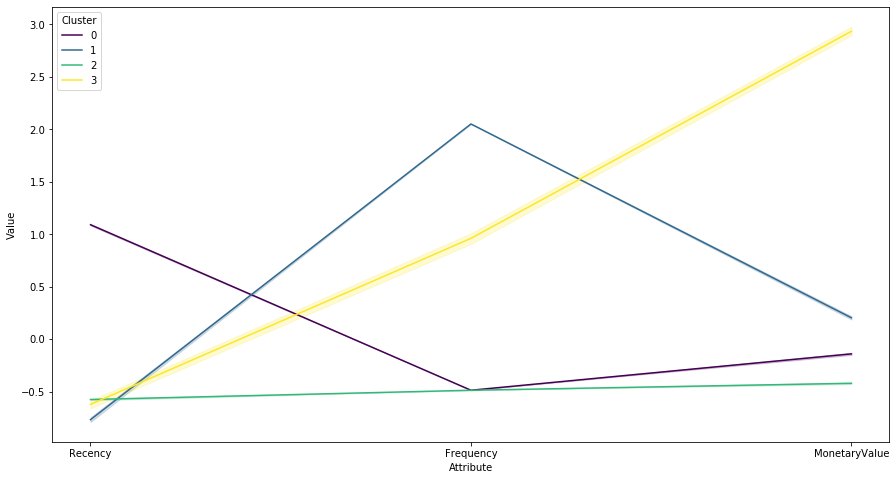

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_nor_melt has columns 'Attribute,' 'Value,' and 'Cluster.'

# Set the figure size
plt.figure(figsize=(15, 8))

# Seaborn line plot with increased size
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt, palette='viridis')

# Show the plot
plt.show()


In [118]:
import pandas as pd
from tabulate import tabulate

# Assuming you have a DataFrame named 'cluster_summary' with the required information
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Type of customers': ['Lost customers/churned customers', 'New customers', 'At risk customers', 'Loyal customers'],
    '%': [36, 15, 41, 6],
    'RFM Interpretation': [
        'Customers who made their last transaction a long time ago,'
        'and who have made few purchases. Therefore, it could be the'
        'cluster of Lost customer/churned customers.',
        "Customers who transacted recently and have a lower purchase frequency, with a low amount of monetary spending.",
        "Customer who made their last transaction a while ago and who made frequent and large purchases in the past.",
        "Most frequent customers with the highest monetary spending amount and transact most recently"
    ]
})
# Display the DataFrame with increased font size
cluster_summary.style.set_properties(**{'font-size': '10pt'})

,Cluster,Type of customers,%,RFM Interpretation
0,0,Lost customers/churned customers,36,"Customers who made their last transaction a long time ago,and who have made few purchases. Therefore, it could be thecluster of Lost customer/churned customers."
1,1,New customers,15,"Customers who transacted recently and have a lower purchase frequency, with a low amount of monetary spending."
2,2,At risk customers,41,Customer who made their last transaction a while ago and who made frequent and large purchases in the past.
3,3,Loyal customers,6,Most frequent customers with the highest monetary spending amount and transact most recently


In [33]:
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue       
           mean      mean          mean  count
Cluster                                       
0         633.7       1.0         287.2  12203
1         408.8       2.4         401.5   5153
2         431.2       1.0         201.0  13888
3         426.3       2.3        2756.3   2213

In [34]:
cluster_avg = rfm.groupby('Cluster').mean()
population_avg = rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,MonetaryValue,Recency,User_Id
Cluster,,,,,
0,NaN,-0.233840,-0.335633,0.264178,-0.068074
1,NaN,0.849605,-0.071404,-0.184593,0.115825
2,NaN,-0.233903,-0.535101,-0.139778,-0.012480
3,NaN,0.779021,5.375125,-0.149715,0.183997


In [35]:
rfm_fig = rfm.copy()

#Remove the outlier for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y3 = rfm_fig['MonetaryValue']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

32637/33457 data points remain.
29412/32637 data points remain.
26526/29412 data points remain.


# Merging RFM with the Data Frame

In [37]:
rfm['User_Id'].value_counts()

0        1
22340    1
22338    1
22337    1
22336    1
        ..
11156    1
11155    1
11154    1
11153    1
33518    1
Name: User_Id, Length: 33457, dtype: int64

In [38]:
import pandas as pd

# Assuming 'rfm' and 'df' are your DataFrames

# Merge the DataFrames based on 'User_Id'
df = pd.merge(df, rfm, on='User_Id', how='inner', suffixes=('_df', '_rfm'))

# Display the resulting merged DataFrame
df


,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name,Recency,Frequency,MonetaryValue,Cluster
0,1,20140,2014.0,2022-12-29,362,Fashion,21053,Shankar Traders,337,1,2014.0,3
1,1,11200,1120.0,2023-01-07,368,Fashion,26472,Shankar Traders,328,2,1970.0,3
2,1,8500,850.0,2023-01-04,368,Fashion,26472,Shankar Traders,328,2,1970.0,3
3,1,1980,198.0,2023-07-13,34,Fashion,27075,Shankar Traders,141,3,900.0,1
4,1,2860,286.0,2022-11-24,34,Fashion,27075,Agra Appliance Arena,141,3,900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43667,1,1130,113.0,2022-01-21,20,F&B,20060,Cuttack Curtain Corner,679,1,113.0,0
43668,1,3120,312.0,2022-02-01,31,F&B,27128,Cuttack Curtain Corner,668,1,312.0,0
43669,1,1200,120.0,2022-01-26,25,F&B,28814,Cuttack Curtain Corner,674,1,120.0,0
43670,1,20,2.0,2022-01-03,2,Other,29107,Rourkela Rice Retail,697,2,4.0,0


In [39]:
df[df['Cluster'] == 3]['Mer_Name'].value_counts().head(3)

Rajasthan Handicrafts      1881
Madurai Music Mania         675
Jai Hind General Stores     546
Name: Mer_Name, dtype: int64

In [147]:
df[df['Cluster'] == 2]['Mer_Name'].value_counts().head(3)

Rajasthan Handicrafts      4994
Saraswati Fabrics          3429
Jai Hind General Stores    1201
Name: Mer_Name, dtype: int64

In [148]:
df[df['Cluster'] == 1]['Mer_Name'].value_counts().head(3)

Rajasthan Handicrafts    5649
Madurai Music Mania      1599
Saraswati Fabrics        1425
Name: Mer_Name, dtype: int64

In [149]:
df[df['Cluster'] == 0]['Mer_Name'].value_counts().head(3)

Rajasthan Handicrafts    6837
Saraswati Fabrics        1532
Madurai Music Mania       838
Name: Mer_Name, dtype: int64

In [151]:
df[df['Cluster'] == 0]['User_Id'].value_counts()

29107    2
28123    1
28057    1
28066    1
28076    1
        ..
8416     1
8419     1
8440     1
8441     1
16976    1
Name: User_Id, Length: 12203, dtype: int64

In [152]:
cluster_0 = df[df['Cluster'] == 0]['User_Id'].value_counts()

In [153]:
cluster_1 = df[df['Cluster'] == 1]['User_Id'].value_counts()

In [154]:
cluster_2 = df[df['Cluster'] == 2]['User_Id'].value_counts()

In [155]:
cluster_3 = df[df['Cluster'] == 3]['User_Id'].value_counts()

In [182]:
cluster_0.index

Int64Index([29107, 28123, 28057, 28066, 28076, 28090, 28091, 28096, 28102,
            28108,
            ...
             8390,  8392,  8398,  8405,  8406,  8416,  8419,  8440,  8441,
            16976],
           dtype='int64', length=12203)

In [223]:
df[df['User_Id'] == 2258]['Cluster']

13768    0
Name: Cluster, dtype: int32

In [215]:
# Assuming 'df' has a column 'Cluster' representing the cluster assignment
cluster_0 = df[df['Cluster'] == 0]['User_Id'].value_counts()
cluster_1 = df[df['Cluster'] == 1]['User_Id'].value_counts()
cluster_2 = df[df['Cluster'] == 2]['User_Id'].value_counts()
cluster_3 = df[df['Cluster'] == 3]['User_Id'].value_counts()
# Sample user ID to check
User_Id = int(input('User_ID = '))

# Check if the user ID is in Cluster 0
if User_Id in cluster_0.index:
    print(f'User: {User_Id} is Good')
elif User_Id in cluster_1.index:
    print(f'User: {User_Id} is Not Loyal')
elif User_Id in cluster_2.index:
    print(f'User: {User_Id} is Bad')
elif User_Id in cluster_3.index:
    print(f'User: {User_Id} is ay kalam')
else:
    print(f'User: {User_Id} does not belong to any cluster')


User_ID =  7


User: 7 is Bad


In [249]:
df[df['Cluster'] == 3]['Category In English'].value_counts().head(3)

Grocery    3068
F&B        1256
Fashion     585
Name: Category In English, dtype: int64

In [248]:
df[df['Cluster'] == 1]['Category In English'].value_counts().head(3)

Grocery    8744
F&B        2254
Fashion     710
Name: Category In English, dtype: int64

In [247]:
df[df['Cluster'] == 2]['Category In English'].value_counts().head(3)

Grocery    9637
F&B        2719
Fashion     960
Name: Category In English, dtype: int64

In [246]:
df[df['Cluster'] == 0]['Category In English'].value_counts().head(3)

Grocery    9245
F&B        1491
Fashion    1078
Name: Category In English, dtype: int64

In [242]:
# Assuming 'mer_0' is a Pandas Series or DataFrame

# Access the index (names)
names = mer_3.index

# Save the numbered names to a list
numbered_names = [f"{i}. {name}" for i, name in enumerate(names, start=1)]

# Print the numbered names under each other
mer_3 ='\n'.join(numbered_names)
print(mer_3)


1. Rajasthan Handicrafts
2. Madurai Music Mania
3. Jai Hind General Stores


In [ ]:
# Assuming 'df' has a column 'Cluster' representing the cluster assignment
cluster_0 = df[df['Cluster'] == 0]['User_Id'].value_counts()
cluster_1 = df[df['Cluster'] == 1]['User_Id'].value_counts()
cluster_2 = df[df['Cluster'] == 2]['User_Id'].value_counts()
cluster_3 = df[df['Cluster'] == 3]['User_Id'].value_counts()

In [217]:
import joblib
joblib.dump(cluster_0 , "cluster_0.pkl")
joblib.dump(cluster_1 , "cluster_1.pkl")
joblib.dump(cluster_2 , "cluster_2.pkl")
joblib.dump(cluster_3 , "cluster_3.pkl")

['cluster_3.pkl']

In [243]:
joblib.dump(mer_0 , "mer_0.pkl")
joblib.dump(mer_1 , "mer_1.pkl")
joblib.dump(mer_2 , "mer_2.pkl")
joblib.dump(mer_3 , "mer_3.pkl")

['mer_3.pkl']

In [227]:
mer_0 = df[df['Cluster'] == 0]['Mer_Name'].value_counts().head(3)
mer_1 = df[df['Cluster'] == 1]['Mer_Name'].value_counts().head(3)
mer_2 = df[df['Cluster'] == 2]['Mer_Name'].value_counts().head(3)
mer_3 = df[df['Cluster'] == 3]['Mer_Name'].value_counts().head(3)

In [221]:
df['Mer_Name'].unique()

array(['Shankar Traders', 'Agra Appliance Arena', 'Radha Emporium',
       'Mohan Brothers Mart', 'Jai Hind General Stores',
       'Rajasthan Handicrafts', 'Lucknow Leather World',
       'Pune Perfumes Paradise', 'Ranchi Rug Retail',
       'Faridabad Footwear Fair', 'Cuttack Curtain Corner',
       'Ganpati Enterprises', 'Gurgaon Gift Gallery',
       'Varanasi Silk House', 'Saraswati Fabrics',
       'Amritsar Auto Accessories', 'Vadodara Vegetables Villa',
       'Indore Instrument Inn', 'Madurai Music Mania',
       'Gwalior Garden Gear', 'Mumbai Fashion Hub',
       'Kanpur Kitchen Appliances', 'Thiruvananthapuram Toy Town',
       'Nashik Noodle Niche', 'Jamshedpur Jeans Junction',
       'Kochi Kitchenware Kingdom', "Bhubaneswar Baker's Boutique",
       'Delhi Electronics', 'Jodhpur Jewelry Junction',
       'Jaipur Pottery Emporium', 'Goa Grocery Galaxy',
       'Dehradun Dairy Delight', 'Krishna Textiles',
       'Ahmedabad Sweet Mart', 'Vijayawada Vegetable Village',
     

In [43]:
ID = df['User_Id']

In [44]:
import joblib
joblib.dump(ID , "ID.pkl")

['ID.pkl']

In [45]:
data = df

In [47]:
import joblib
joblib.dump(data , "data.pkl")

['data.pkl']

In [59]:
import pandas as pd
from datetime import datetime

# Assuming you have a DataFrame named 'df' with columns like ['Trx_Rank', 'Points', 'Trx_Vlu', 'Trx_Age', 'Customer_Age', 'Category In English', 'User_Id', 'Mer_Name']

# Step 1: Convert 'Trx_Age' to datetime if it's not already
df['Trx_Age'] = pd.to_datetime(df['Trx_Age'])

# Step 2: Calculate Recency, Frequency, and Monetary values for each user
current_date = max(df['Trx_Age'])  # Use the latest date in the dataset as the current date

rfm_data = df.groupby('User_Id').agg({
    'Trx_Age': lambda x: (current_date - x.max()).days,  # Recency
    'Points': 'count',  # Frequency
    'Trx_Vlu': 'sum'  # Monetary Value
}).reset_index()

rfm_data.columns = ['User_Id', 'recency', 'frequency', 'monetary']

# Step 3: Assign RFM scores
rfm_data['recency_score'] = rfm_data['recency'].rank(ascending=False)

# Step 4: Assign Frequency and Monetary scores as before
rfm_data['frequency_score'] = pd.qcut(rfm_data['frequency'], q=5, labels=False, duplicates='drop') + 1
rfm_data['monetary_score'] = pd.qcut(rfm_data['monetary'], q=5, labels=False, duplicates='drop') + 1

# Step 5: Calculate RFM Group
rfm_data['rfm_group'] = rfm_data['recency_score'].astype(int).astype(str) + rfm_data['frequency_score'].astype(str) + rfm_data['monetary_score'].astype(str)

# Step 6: Analyze and Interpret the Results
# You can analyze different user segments based on their RFM scores and create marketing strategies accordingly.

# Example: High-Value Users
high_value_users = rfm_data[rfm_data['rfm_group'] == '555']

# Example: Inactive Users
inactive_users = rfm_data[rfm_data['recency_score'] >= 4]

# ... and so on.

# Step 7: Use the RFM Data for Marketing Strategies
# Tailor your marketing strategies based on the insights gained from the RFM analysis.


In [60]:
rfm_data

,User_Id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_group
0,0,417,1,442.7,25198.5,1,5,2519815
1,1,664,1,249.0,4615.5,1,3,461513
2,2,462,1,300.0,17344.0,1,4,1734414
3,3,378,1,162.0,29018.5,1,2,2901812
4,4,291,1,70.0,32252.0,1,1,3225211
...,...,...,...,...,...,...,...,...
33452,33514,430,3,594.0,23132.5,1,5,2313215
33453,33515,454,1,48.0,18114.0,1,1,1811411
33454,33516,442,1,132.0,20569.0,1,1,2056911
33455,33517,685,1,210.0,1157.5,1,3,115713


In [109]:
df

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
0,1,20140,2014.0,1970-01-01 00:00:00.000000362,362,Fashion,21053,Shankar Traders
1,1,11200,1120.0,1970-01-01 00:00:00.000000371,368,Fashion,26472,Shankar Traders
2,1,8500,850.0,1970-01-01 00:00:00.000000368,368,Fashion,26472,Shankar Traders
3,1,1980,198.0,1970-01-01 00:00:00.000000558,34,Fashion,27075,Shankar Traders
4,1,2400,240.0,1970-01-01 00:00:00.000000413,413,Fashion,27417,Shankar Traders
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,1970-01-01 00:00:00.000000027,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,1970-01-01 00:00:00.000000031,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,1970-01-01 00:00:00.000000025,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,1970-01-01 00:00:00.000000002,2,Other,29107,Rourkela Rice Retail


In [105]:
rfm_data['recency'].value_counts()

0    33457
Name: recency, dtype: int64

In [76]:
len(df['Mer_Name'].unique())

56

In [74]:
df

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders
2,1,8500,850.0,368,368,Fashion,26472,Shankar Traders
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from category_encoders.binary import BinaryEncoder
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [71]:
    Encoder = ColumnTransformer(transformers=[  ("OHE" , OneHotEncoder(sparse=False , drop="first") , ["Category In English"]) , ("LE",LabelEncoder() , ["Mer_Name"])] , remainder="passthrough")

In [72]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
label_encoder = LabelEncoder()
df['Mer_Name'] = label_encoder.fit_transform(df['Mer_Name'])


In [73]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'df' is your DataFrame
encoder = OneHotEncoder(sparse=False, drop='first')

# Reshape the column to a 2D array as OneHotEncoder expects a 2D input
data_2d = df['Category In English'].values.reshape(-1, 1)

# Fit and transform the data
encoded_data = encoder.fit_transform(data_2d)

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Category In English']))


In [74]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Mer_Name' is the column to be one-hot encoded
df = pd.get_dummies(df, columns=['Category In English'], prefix='Category')


In [75]:
df

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,User_Id,Mer_Name,Category_Electronics,Category_F&B,Category_Fashion,Category_Grocery,Category_Health & Beauty,Category_Other,Category_Transportaion
0,1,20140,2014.0,362,362,21053,46,0,0,1,0,0,0,0
1,1,11200,1120.0,371,368,26472,46,0,0,1,0,0,0,0
2,1,8500,850.0,368,368,26472,46,0,0,1,0,0,0,0
3,1,1980,198.0,558,34,27075,46,0,0,1,0,0,0,0
4,1,2400,240.0,413,413,27417,46,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,26865,8,0,1,0,0,0,0,0
43668,1,3120,312.0,31,31,27128,8,0,1,0,0,0,0,0
43669,1,1200,120.0,25,25,28814,8,0,1,0,0,0,0,0
43670,1,20,2.0,2,2,29107,44,0,0,0,0,0,1,0


In [19]:
df.drop(['User_Id'], axis=1, inplace=True)

In [20]:
df

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Mer_Name,Category_Electronics,Category_F&B,Category_Fashion,Category_Grocery,Category_Health & Beauty,Category_Other,Category_Transportaion
0,1,20140,2014.0,362,362,46,0,0,1,0,0,0,0
1,1,11200,1120.0,371,368,46,0,0,1,0,0,0,0
2,1,8500,850.0,368,368,46,0,0,1,0,0,0,0
3,1,1980,198.0,558,34,46,0,0,1,0,0,0,0
4,1,2400,240.0,413,413,46,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,8,0,1,0,0,0,0,0
43668,1,3120,312.0,31,31,8,0,1,0,0,0,0,0
43669,1,1200,120.0,25,25,8,0,1,0,0,0,0,0
43670,1,20,2.0,2,2,44,0,0,0,0,0,1,0


In [21]:
df = StandardScaler().fit_transform(df)

In [22]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=5,
    n_init=20,
    max_iter=500,
    random_state=2
)

In [23]:
kmeans.fit(df)

KMeans(max_iter=500, n_clusters=5, n_init=20, random_state=2)

In [24]:
# The lowest SSE value
print(f"Inertia = {kmeans.inertia_}")

# Final locations of the centroid
print(f"Cluster centers are: {kmeans.cluster_centers_}")

# The number of iterations required to converge
print(f"The number of iterations until convergence is {kmeans.n_iter_} iterations")

Inertia = 308929.0546005092
Cluster centers are: [[ 0.07192299 -0.05349855 -0.05349855  0.440335    0.29537778 -0.94450914
  -0.07244402  2.09407061 -0.28744522 -1.53788145 -0.18885671  0.14832877
   0.26172563]
 [-0.01903401 -0.02767251 -0.02767251 -0.12222185 -0.07800831  0.54142308
  -0.07244402 -0.4633905  -0.28744522  0.65024518 -0.18885671 -0.03282322
  -0.05791647]
 [-0.09211728  0.20520555  0.20520555 -0.11777851 -0.03904729 -2.26723138
  -0.07244402 -0.4633905   3.47892373 -1.53788145 -0.18885671 -0.03282322
  -0.05791647]
 [ 1.08453621  3.27925655  3.27925655  0.12163334  0.07156455 -0.31701677
  12.8409237  -0.4633905  -0.28744522 -1.38605226 -0.18885671 -0.03282322
  -0.05791647]
 [ 0.03729733 -0.14303487 -0.14303487  0.41740986  0.11193339 -0.99799445
  -0.07244402 -0.4633905  -0.28744522 -1.53788145  5.29501974 -0.03282322
  -0.05791647]]
The number of iterations until convergence is 10 iterations


In [30]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 8)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[7 3 3 ... 2 4 4]


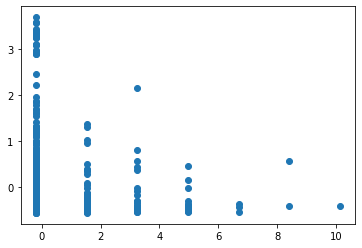

In [31]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

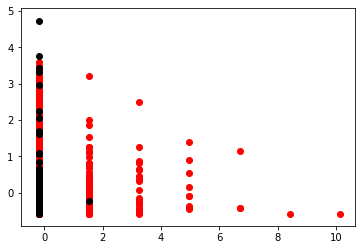

In [35]:
#filter rows of original data
filtered_label2 = df[label == 3]
 
filtered_label8 = df[label == 5]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

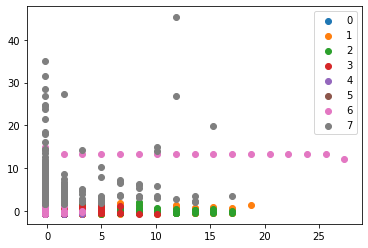

In [36]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [46]:
456130.4633861282/184443.87685242444

2.4730040984287225

In [261]:
62577762965.21206/355736230255.1284

0.17591056980710756

In [29]:
kmeans.labels_

array([0, 3, 3, ..., 7, 4, 4])

In [264]:
from mpl_toolkits.mplot3d import Axes3D

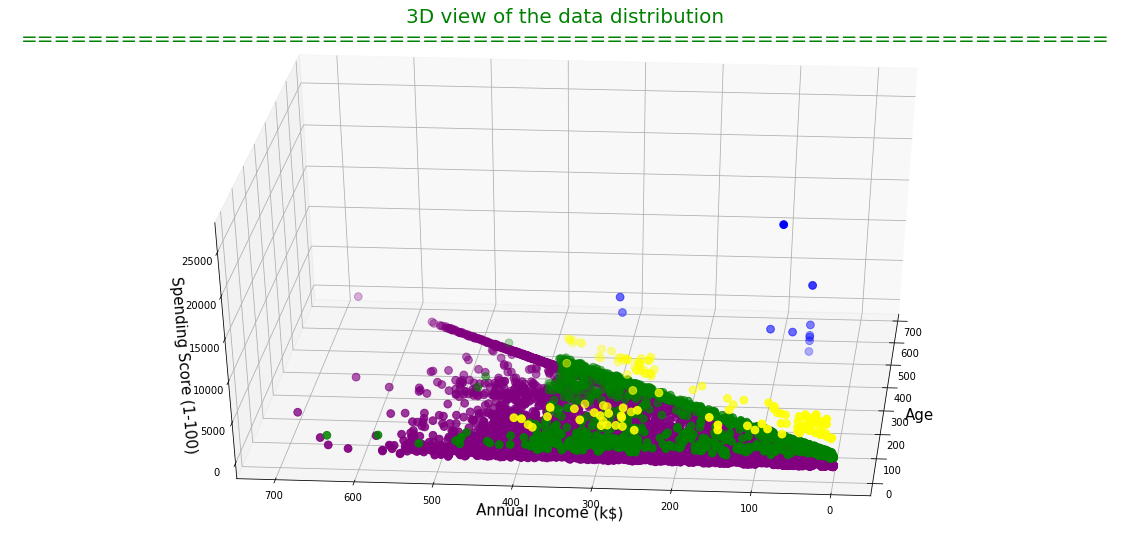

In [273]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Customer_Age[labels == 0], df["Trx_Age"][labels == 0], df["Trx_Vlu"][labels == 0], c='purple', s=60)
ax.scatter(df.Customer_Age[labels == 2], df["Trx_Age"][labels == 2], df["Trx_Vlu"][labels == 2], c='blue', s=60)
ax.scatter(df.Customer_Age[labels == 3], df["Trx_Age"][labels == 3], df["Trx_Vlu"][labels == 3], c='green', s=60)
ax.scatter(df.Customer_Age[labels == 4], df["Trx_Age"][labels == 4], df["Trx_Vlu"][labels == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.title("3D view of the data distribution\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel('Spending Score (1-100)', fontsize=15)
plt.show()

In [210]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [130]:
# The lowest SSE value
print(f"Inertia = {kmeans.inertia_}")

# Final locations of the centroid
print(f"Cluster centers are: {kmeans.cluster_centers_}")

# The number of iterations required to converge
print(f"The number of iterations until convergence is {kmeans.n_iter_} iterations")

Inertia = 355736230255.1284
Cluster centers are: [[ 1.10663964e+00  2.32956261e+03  2.32956261e+02  1.83040460e+02
   1.42464437e+02  3.34360645e+01  3.98089172e-03  1.78657595e-01
   7.30312681e-02  7.04617834e-01  3.53213665e-02  1.08569774e-03
   3.30534646e-03]
 [ 1.14845551e+00  1.97459152e+04  1.97459152e+03  2.27610420e+02
   1.75939604e+02  3.18833564e+01  2.02858460e-02  1.44767174e-01
   1.39695712e-01  6.71738128e-01  1.84416782e-02  9.22083910e-04
   4.14937759e-03]
 [ 4.21818182e+00  9.57812727e+04  9.57812727e+03  1.29527273e+02
   6.37272727e+01  4.09818182e+01  3.45454545e-01  1.81818182e-02
   5.45454545e-02  5.81818182e-01 -6.93889390e-18 -2.16840434e-19
  -8.67361738e-19]]
The number of iterations until convergence is 7 iterations


In [67]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
calinski_harabasz_score_value = calinski_harabasz_score(df, kmeans.labels_)
calinski_harabasz_score_value

12179.747212958226

In [37]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
calinski_harabasz_score_value = calinski_harabasz_score(df, kmeans.labels_)
calinski_harabasz_score_value

12962.568011254882

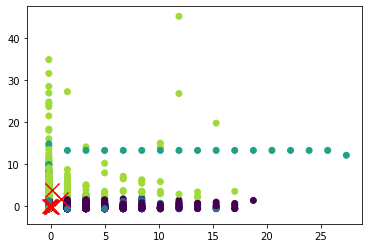

In [69]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=8)
kmeans.fit(df)
plt.scatter(df[:, 0], df[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()


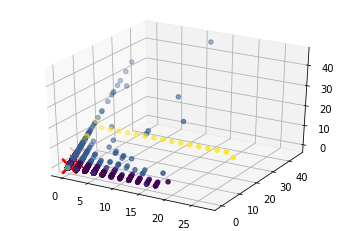

In [71]:
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=8)
kmeans.fit(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[:, 0], df[:, 1], df[:, 2], c=kmeans.labels_, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='x', s=200, linewidths=3, color='r')
plt.show()


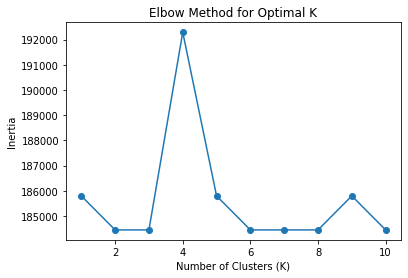

In [72]:
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=8)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [30]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

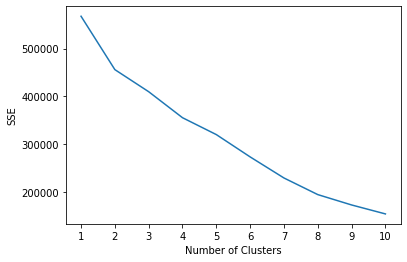

In [31]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

6

In [47]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

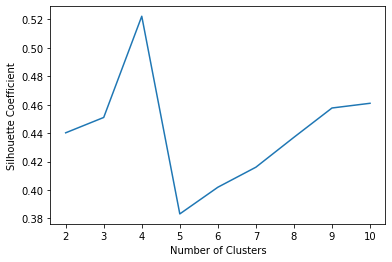

In [48]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [49]:
kl = KneeLocator(range(3, 11), silhouette_coefficients[1:], curve="convex", direction="decreasing")

kl.elbow

3

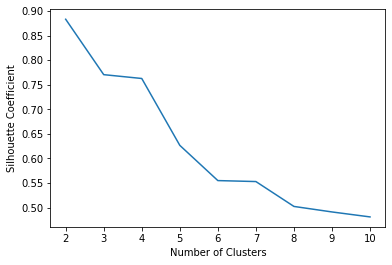

In [137]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [138]:
kl = KneeLocator(range(3, 11), silhouette_coefficients[1:], curve="convex", direction="decreasing")

kl.elbow

8

In [38]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import matplotlib.pyplot as plt


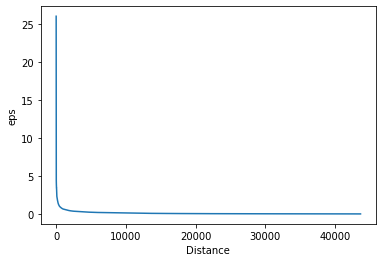

In [40]:
minPts = 5
#selection of eps value
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(df)
distances, indices = nbrs.kneighbors(df, minPts-1)
kDis = distances[:, minPts-2]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

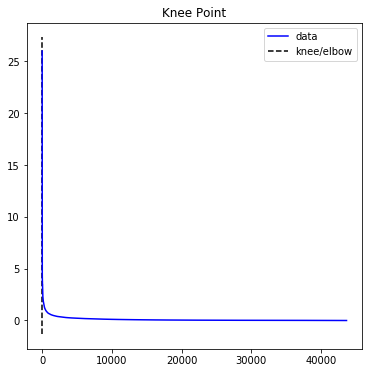

In [41]:
kl = KneeLocator(range(0, len(kDis)), kDis, curve="convex", direction="decreasing")

kl.plot_knee()

In [42]:
eps = kDis[kl.elbow]
print(f"Value of eps = {eps}")

Value of eps = 3.4417590462185217


In [43]:
# Compute DBSCAN
db = DBSCAN(eps=eps, min_samples=minPts).fit(X)
labels = db.labels_
# labels

In [56]:
df

array([[-0.19383143,  2.92335809,  2.92335809, ..., -0.18885671,
        -0.03282322, -0.05791647],
       [-0.19383143,  1.37027934,  1.37027934, ..., -0.18885671,
        -0.03282322, -0.05791647],
       [-0.19383143,  0.90122871,  0.90122871, ..., -0.18885671,
        -0.03282322, -0.05791647],
       ...,
       [-0.19383143, -0.36694521, -0.36694521, ..., -0.18885671,
        -0.03282322, -0.05791647],
       [-0.19383143, -0.57193771, -0.57193771, ..., -0.18885671,
        30.46623523, -0.05791647],
       [-0.19383143, -0.57193771, -0.57193771, ..., -0.18885671,
        30.46623523, -0.05791647]])

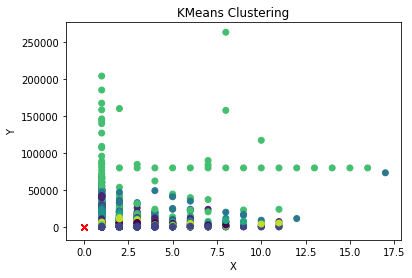

In [83]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing

def main():
    # Load data set
    dataset = df.values.tolist()  # Assuming df is your Pandas DataFrame
    # print(df)

    # Normalize dataset
    normalized_dataset = preprocessing.normalize(dataset)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=11)
    labels = kmeans.fit_predict(normalized_dataset)
    centers = kmeans.cluster_centers_

    # Plot the data points and cluster centers
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)  # Use .iloc for integer-location based indexing
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('KMeans Clustering')
    plt.show()

if __name__ == "__main__":
    main()


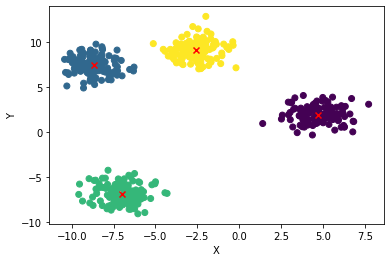

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate some random data
X, y = make_blobs(n_samples=500, centers=4, random_state=42)

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='r')
plt.xlabel('X')
plt.ylabel('Y')

# Display the plot
plt.show()